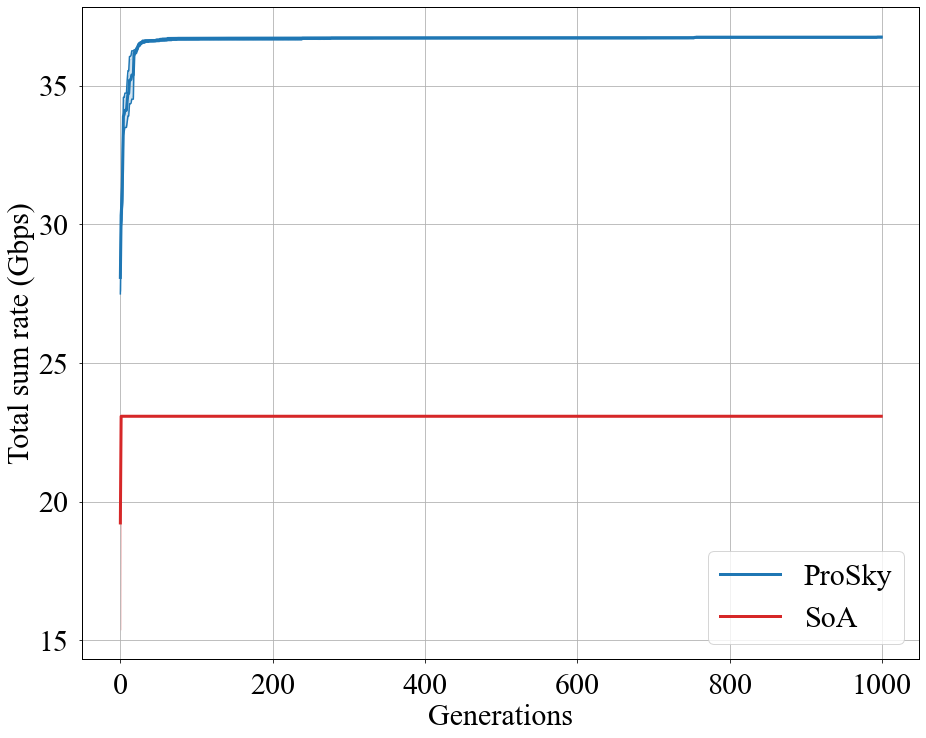

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle 
import seaborn as sns 
import numpy as np
import scipy.stats
import warnings

warnings.filterwarnings("ignore")  

#sns.set_theme(style="darkgrid")

mpl.rcParams['axes.linewidth'] = 1
plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (15,12)
plt.rcParams["font.family"] = "Times New Roman"
plt.tick_params(axis='both', which='major', pad=10)
marker_style = dict(color='tab:blue', linestyle='-', linewidth=3, fillstyle='none', clip_on=False)
marker_style_2 = dict(color='tab:red', linestyle='-', linewidth=3, fillstyle='none', clip_on=False)

ITERATIONS = 6

x = []
SUM_NEAT = []

def mean_confidence_interval(data, confidence=0.682):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def list_confidence_interval(list, confidence):
    s1 = []
    s2 = []
    for i in range(1000):
        s = []
        for ii in range(ITERATIONS):
            s.append(list[i + ii*1000])
        _, y1, y2 = mean_confidence_interval(s, confidence/100)
        s1.append(y2)
        s2.append(y1)
    return s1, s2


for iteration in range(ITERATIONS):
            Start_Reading = f"Pickle/best_Fitness-{iteration}.pickle"
            with open(Start_Reading, "rb") as f:
                x.extend(list(range(1000)))
                SUM_NEAT.extend(pickle.load(f))
SUM_NEAT = [e/1000 for e in SUM_NEAT]    
SUM_NEAT_1, SUM_NEAT_2 = list_confidence_interval(SUM_NEAT, 68.2)
SoA = [23.080 for _ in SUM_NEAT]

SoA[0] = 0

plt.xlabel('Generations')
plt.ylabel('Total sum rate (Gbps)')
plt.grid()
ax = sns.lineplot(x, SUM_NEAT, **marker_style, ci=68.2, label="ProSky", dashes=True, markers = "True")
plt.plot(SUM_NEAT_1, color='tab:blue')
plt.plot(SUM_NEAT_2, color='tab:blue')
ax = sns.lineplot(x, SoA, **marker_style_2, ci=68.2, label="SoA")
plt.savefig('ProSky-VS-SoA-Generations.pdf', bbox_inches = 'tight')
plt.legend(loc="lower right")
plt.show()


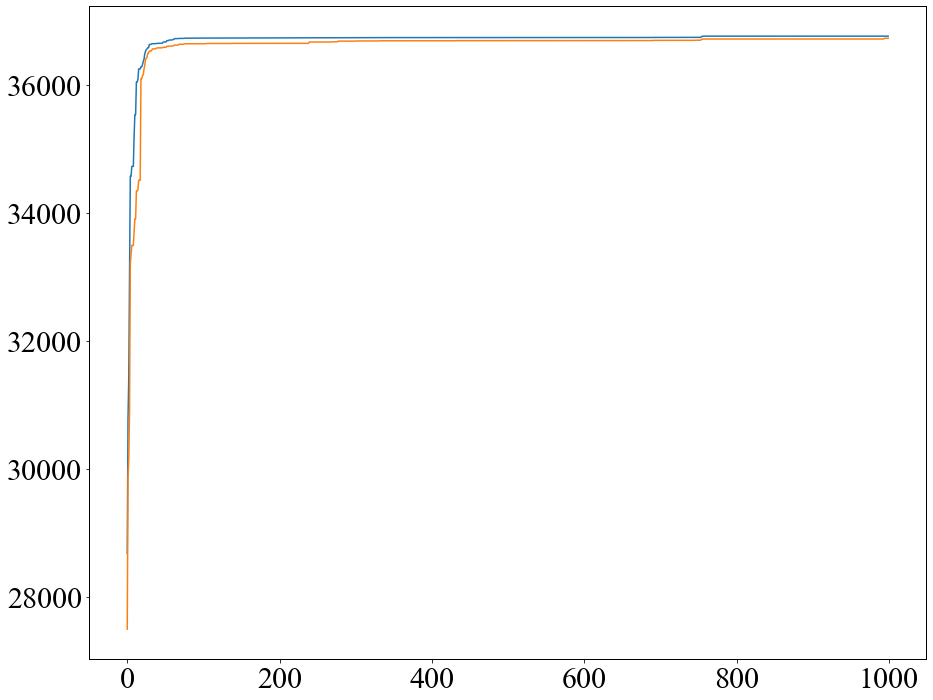

In [12]:
s = []
SUM_NEAT_1 = []
SUM_NEAT_2 = []

for i in range(1000):
    s = []
    for ii in range(6):
        s.append(SUM_NEAT[i + ii*1000])
    _, y1, y2 = mean_confidence_interval(s, confidence=0.682)
    SUM_NEAT_1.append(y2)
    SUM_NEAT_2.append(y1)
        
plt.plot(SUM_NEAT_1)
plt.plot(SUM_NEAT_2)